# hapter 7.1 _ Keras_ Practice with  kaggle compation example, part2

# Titanic: Deep Learning from Disaster

https://www.kaggle.com/c/titanic/data

<img src="https://annoyzview.files.wordpress.com/2015/05/rms-titanic-sinking.jpg" style="width=100%;hiegh=20px">

# Data

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features. <br>
<b>(outputs are that a persion is dead or live (0 = No, 1 = Yes) according to pclass(Ticket class # 1 = 1st, 2 = 2nd, 3 = 3rd),sex, Age, sibsp(of siblings / spouses aboard the Titanic), parch(of parents / children aboard the Titanic), ticket (Ticket number), fare(Passenger fare), cabin (Cabin number), embarked(Port of Embarkation_C # Cherbourg, Q = Queenstown, S = Southampton)  _ Survived is label)</b>

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

pclass(Ticket class # 1 = 1st, 2 = 2nd, 3 = 3rd),<br>
sex, <br>
Age, <br>
sibsp(of siblings / spouses aboard the Titanic), <br>
parch(of parents / children aboard the Titanic), <br>
ticket (Ticket number), fare(Passenger fare), <br>
cabin (Cabin number), <br>
embarked(Port of Embarkation_C # Cherbourg, Q = Queenstown, S = Southampton) _ Survived is label)<br>

### import data:

In [3]:
import pandas as pd

In [4]:
train_ts = pd.read_csv('data/Chapter7/Chapter7.1-titanic/train.csv',na_values=["NA","?"])
test_ts = pd.read_csv('data/Chapter7/Chapter7.1-titanic/test.csv',na_values=["NA","?"])
gender_ts = pd.read_csv('data/Chapter7/Chapter7.1-titanic/gender_submission.csv',na_values=["NA","?"])

In [5]:
print("len train data =",len(train_ts))
train_ts.head(3)

len train data = 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
print("len test data =",len(test_ts))
test_ts.sample(2)

len test data = 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
218,1110,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5000,C80,C
264,1156,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30.0,0,0,C.A. 34644,12.7375,NaN,C


In [7]:
print("len gender data =",len(gender_ts))
gender_ts.sample(2)

len gender data = 418


,PassengerId,Survived
161,1053,0
247,1139,0


### Ready Data:

In [8]:
print('for Cabin=\n',train_ts.Cabin.isnull().value_counts())
print("-------------")
print('for Age=\n',train_ts.Age.isnull().value_counts())
print("-------------")
print('for Embarked=\n',train_ts.Embarked.isnull().value_counts())

for Cabin=
 True     687
False    204
Name: Cabin, dtype: int64
-------------
for Age=
 False    714
True     177
Name: Age, dtype: int64
-------------
for Embarked=
 False    889
True       2
Name: Embarked, dtype: int64


<b>step:
1. Drop PassengerId, Name, Ticket

2. handle the miss data for cabin, 
3. handle the miss data for Age,
4. handle the miss data for Embarked.

5. covert Sex column from string to numeber.
6. cnvert Embarked column from string into number
7. cnvert Cabin column from string into number or remove this column.

In [9]:
from farhad_DL.utility import missing_default    # for 2 
from farhad_DL.utility import missing_median     # for 3
from farhad_DL.utility import missing_maxitration # for 4 
from farhad_DL.utility import encode_text_index  # for 5, 6, 7

from farhad_DL.utility import encode_numeric_zscore

In [10]:
PassengerId, Name, Ticket = train_ts.PassengerId, train_ts.Name, train_ts.Ticket
train_ts = train_ts.drop(['PassengerId','Name','Ticket'],axis=1) # for 1

missing_default(train_ts,'Cabin', 'znotmention')        # for 2
missing_median(train_ts,'Age')                          # for 3 
missing_maxitration(train_ts,'Embarked')                # for 4

num_sexclasses = encode_text_index(train_ts,'Sex')            # for 5, 6, 7
num_Embarkedclasses = encode_text_index(train_ts, 'Embarked')
num_Cabinclasses = encode_text_index(train_ts, 'Cabin')

In [11]:
train_ts.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.25,147,2


In [12]:
from farhad_DL.utility import to_xy

In [13]:
x,y = to_xy(train_ts, 'Survived')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

### decribe the model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout

In [17]:
def titanic_model_1():
    model = Sequential()
    
    model.add(Dense(30,input_dim=x.shape[1],activation='relu'))
    
    model.add(Dense(20))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    Dropout(rate=0.3)
    
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    Dropout(rate=0.3)
    
    model.add(Dense(5))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(2,activation="softmax"))
    
    return model

In [17]:
def titanic_model_2():
    model = Sequential()
    
    model.add(Dense(30, input_dim=x.shape[1],activation='relu'))
    model.add(Dense(20, activation="relu"))
    
    model.add(Dense(2, activation="softmax"))
    return model


### Feed models:

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.logging import set_verbosity, ERROR

from farhad_DL.utils import TimeSummary, plot_training_summary, Estimate_cpu
from farhad_DL.utility import plot_confusion_matrix


from sklearn.metrics import confusion_matrix
import numpy as np

Using TensorFlow backend.


### <font color="red">for first model

179/179 [==============================] - 0s 53us/step
final loss =  2.2422486463738553
fincal accuracy =  0.435754191109588
Training time: 0:00:20.741638(HH:MM:SS)
Epoch time avg: 0:00:00.087378(HH:MM:SS)


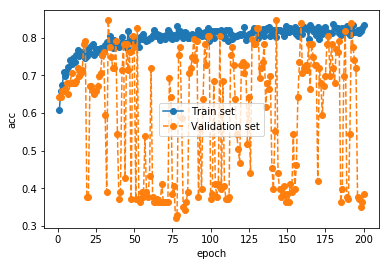

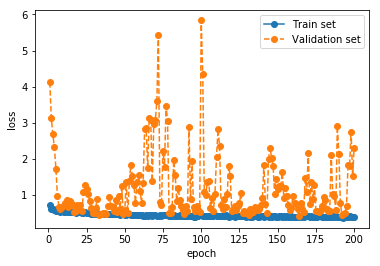

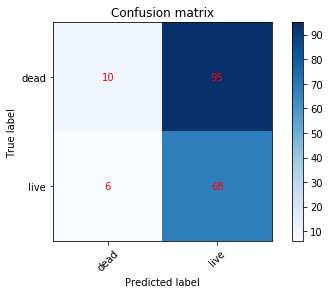

In [113]:
set_verbosity(ERROR)

time_summary = TimeSummary()
monitor = EarlyStopping(monitor='val_cross',mode='auto',verbose=0)
checkpoint = ModelCheckpoint(filepath='model_save/weights.modelone_titanic.hdf5',
                             mode='atuo',save_weights_only=True)


model = titanic_model_1()
model.compile(optimizer='Adam',loss=binary_crossentropy, metrics=['accuracy'])
summary = model.fit(x_train, y_train, validation_split=0.20,
                    verbose=0,
                    callbacks=[time_summary,monitor,checkpoint],
                    batch_size=60,
                    epochs=200)

model.load_weights("model_save/weights.modelone_titanic.hdf5")
score = model.evaluate(x_test,y_test)
print("final loss = ",score[0])
print('fincal accuracy = ',score[1])
plot_training_summary(summary, time_summary)


pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_camper = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_camper,pred)
plot_confusion_matrix(cm,['dead','live'])

### <font color="red">for secound model

In [ ]:
set_verbosity(ERROR)

running = Estimate_cpu()
time_summary2 = TimeSummary()
monitor2 = EarlyStopping(monitor='val_cross',mode='auto',verbose=0)
checkpoint2 = ModelCheckpoint(filepath='model_save/2weights.modelone_titanic.hdf5',
                             mode='atuo',save_weights_only=True)


model2 = titanic_model_2()
model2.compile(optimizer='Adam',loss=binary_crossentropy, metrics=['accuracy'])
summary = model2.fit(x_train, y_train, validation_split=0.20,
                    verbose=0,
                    callbacks=[time_summary2,monitor2,checkpoint2,running],
                    batch_size=40,
                    epochs=1000)

model2.load_weights("model_save/2weights.modelone_titanic.hdf5")
score2 = model2.evaluate(x_test,y_test)
print("final loss = ",score2[0])
print('fincal accuracy = ',score2[1])

pred2 = model2.predict(x_test)
pred2 = np.argmax(pred2,axis=1)
y_camper = np.argmax(y_test, axis=1)
print('#############################')
plot_training_summary(summary, time_summary2)

cm2 = confusion_matrix(y_camper,pred2)
plot_confusion_matrix(cm2,['dead','live'])

[{}/792][Time: 13 minutes 48 seconds]#[Remain :0:13:48.591891][Memory: 73.1][Cpu: [35.6, 14.9, 31.0, 16.8]

### save model

In [ ]:
import os
save_path = 'model_save'
model2_json = model2.to_json()
withopen(os.path.join(save_path,"network_titanic_kaggle.json"), "w") as f:
    f.wrirte(model2_json)

## <font color="#A52A2A">Generate Kaggle submit file

In [125]:
test_ts = pd.read_csv('data/Chapter7/Chapter7.1-titanic/test.csv',na_values=["NA","?"])
test_ts.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [ ]:
PassengerId, Name, Ticket = test_ts.PassengerId, test_ts.Name, test_ts.Ticket
test_ts = test_ts.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

missing_default(train_ts,'Cabin', 'znotmention')        # for 2
missing_median(train_ts,'Age')                          # for 3 
missing_maxitration(train_ts,'Embarked')                # for 4

num_sexclasses = encode_text_index(train_ts,'Sex')            # for 5, 6, 7
num_Embarkedclasses = encode_text_index(train_ts, 'Embarked')
num_Cabinclasses = encode_text_index(train_ts, 'Cabin')


encode_numeric_zscore(train_ts,'Age')
encode_numeric_zscore(train_ts,'Fare')

In [ ]:
# Generate Kaggle submit file
# Encode feature vector

x = test_ts.as_matrix().astype(np.float32)

# Generate predictions
pred = model2.predict(x)
#pred

# Create submission data set

df_submit = pd.DataFrame(pred, columns=['predict'])
df_submit.insert(0,'PassengerId',PassengerId)
df_submit.columns = ['PassengerId','Dead','Survive']

filename_submit= 'data/Chapter7/Chapter7.1-titanic/predication_titanic.csv'
df_submit.to_csv(filename_submit, index=False)

print(df_submit)